In [1]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


In [2]:
ds=pd.read_csv("HateSpeechData.csv")

In [3]:
ds['text_length']=ds['tweet'].apply(len)
#added a column text_length in the dataset

In [4]:
tweet=ds.tweet


# Preprocessing the tweets

In [5]:
import re
from nltk.stem.porter import PorterStemmer

stopwords = nltk.corpus.stopwords.words("english")
stemmer = PorterStemmer()
#ff-follow friday,#rt=retweet,Mt-modified tweet
others = ["#ff", "rt","MT"]
#extending stopwords
stopwords.extend(others)

def preprocess(tweet):  
    
    # removing extra spaces
    ex= re.compile(r'\s+')
    tweet_space = tweet.str.replace(ex, ' ')
    
    # removing '@'(mentions)
    ex = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(ex, '')
    
    # removing url's (https://xyz.com)
    gex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|' '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(gex, '')
    
    # removing punctuations and numbers
    punctuation_remove = tweets.str.replace("[^a-zA-Z]", " ")
    
    # removing whitespace with a single space
    newtweet=punctuation_remove.str.replace(r'\s+', ' ')
    
    # removing leading and trailing whitespace
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    
    # replace normal numbers with numbr
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    
    # lowercasing the tweet
    tl = newtweet.str.lower()
    
    # tokenizing
    tokenized_tweet = tl.apply(lambda x: x.split())
    
    # removing stopwords
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [i for i in x if i not in stopwords])
    
    # stemming of the tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tp= tokenized_tweet
    
    return tp

processed_tweets = preprocess(tweet)   

ds['processed_tweets'] = processed_tweets
    

In [6]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(ds['processed_tweets'] )


In [7]:
X = tfidf
y = ds['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Model Fitting

# 1)Logistic Regression


In [8]:
#from sklearn.metrics import precision_score,recall_score,roc_auc_score
model = LogisticRegression().fit(X_train,y_train)
y_preds = model.predict(X_test)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression")
print("Accuracy score: %f"%(acc*100)+"%")


Logistic Regression
Accuracy score: 89.751866%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# RandomForest

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_preds = rf.predict(X_test)
acc1=accuracy_score(y_test,y_preds)
print("Random Forest")
print("Accuracy score: %f"%(acc1*100)+"%")


Random Forest
Accuracy score: 90.397418%


# Naive Bayes

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train,y_train)
y_preds = nb.predict(X_test)
acc2=accuracy_score(y_test,y_preds)
print("Naive Bayes")
print("Accuracy Score:%f"%(acc2*100)+"%")

Naive Bayes
Accuracy Score:64.918297%


# SVM

In [13]:
support =LinearSVC(random_state=20)
support.fit(X_train,y_train)
y_preds = support.predict(X_test)
acc3=accuracy_score(y_test,y_preds)
print("SVM")
print("Accuracy Score:%f"%(acc3*100)+"%")

SVM
Accuracy Score:89.328223%


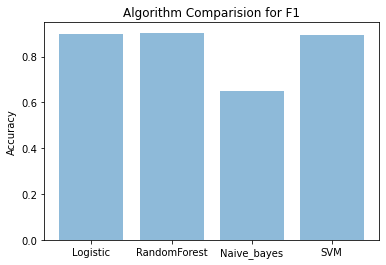

In [15]:
import matplotlib.pyplot as plt
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2,acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for F1')
plt.show()